In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
warnings.filterwarnings('ignore')
%matplotlib inline

# 경향성이 있는 그래프의 선형적으로 증가할 수 있게 하는 함수 
def trend(time, slope = 0):
    return time * slope

# x: 시간축인 함수 plot 함수
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

# 120개씩 자르는 함수 
def univariate_data(dataset, start_index, end_index):
    data = []
    history_size = 120
    start_index = start_index + history_size


    for i in range(start_index, end_index, 120): # 0
        indices = range(i - history_size, i) # [0 - 120] , [120 - 240] ...
        # Reshape data from (history_size,) to (history_size, 1)

        data.append(dataset[indices])

    return np.array(data)

for i in range(1,9):
    globals()['df_'+str(i) ]= pd.read_csv('./temperature_csv_file/temp_df_{}.csv'.format(i), encoding = 'cp949')

df_all = pd.concat([df_1, df_2], axis = 0)
df_all = pd.concat([df_all, df_3], axis = 0)
df_all = pd.concat([df_all, df_4], axis = 0)
df_all = pd.concat([df_all, df_5], axis = 0)
df_all = pd.concat([df_all, df_6], axis = 0)
df_all = pd.concat([df_all, df_7], axis = 0)
df_all = pd.concat([df_all, df_8], axis = 0)

df_all = df_all[:601800].reset_index().drop(columns = ['index'], axis = 0)

for i in range(1,8):
    globals()['df_'+str(i)+'_tmp'] = df_all[85920*(i-1):85920*i].reset_index().drop(columns=['index'], axis=0)


for i in range(1,8):
    mean = globals()['df_'+str(i)+'_tmp']['TEMP'].mean()
    diff  = 261.7292228119181 - mean
    globals()['df_'+str(i)+'_tmp']['TEMP'] += diff

for i in range(8,12):
    globals()['df_'+str(i)+'_tmp'] = globals()['df_'+str(i-5)+'_tmp'].copy()

N = 6
dx = (600 - df_1_tmp['TEMP'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
dx_minute = dx / (len(df_1_tmp)-1) # 분당 증가율

time = np.arange(85920)
slope = dx_minute * 2

def trend(time, slope = 0):
    return time * slope

for i in range(2,12):
    series = np.round(trend(time, slope = slope) + globals()['df_'+str(i)+'_tmp']['TEMP'] + dx*(i-2), 3)
    globals()['df_'+str(i)+'_tmp']['TEMP'] = series


univariate_past_history = 120

for i in range(1,12):
    data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'Group' : []}

    for j in range(716):
        MEAN = np.round(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)].mean(),3)
        MIN = np.min(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)])
        MAX = np.max(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)])
        STD = np.std(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)])
        skew = globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)].skew()
        kurt = globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)].kurt()
        median = globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)].median()
        a, b = np.percentile(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)], q=[25,75])
        data['Group'].append(i)
        data['MEAN_TEMP'].append(MEAN)
        data['MIN'].append(MIN)
        data['MAX'].append(MAX)
        data['STD'].append(STD)
        data['SKEW'].append(skew)
        data['KURT'].append(kurt)
        data['MEDIAN'].append(np.round(median,3))
        data['25%'].append(np.round(a,3))
        data['75%'].append(np.round(b,3))

    globals()['group_'+str(i)] = pd.DataFrame(data)

TIME = pd.DataFrame({'TIME' : np.arange(7876)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = ['index'], inplace = True)
df = tmp


In [ ]:
for i in range(1,8):
    globals()['df_'+str(i)+'_tmp'] = df_all[85920*(i-1):85920*i].reset_index().drop(columns=['index'], axis=0)


for i in range(1,8):
    mean = globals()['df_'+str(i)+'_tmp']['TEMP'].mean()
    diff  = 261.7292228119181 - mean
    globals()['df_'+str(i)+'_tmp']['TEMP'] += diff

for i in range(8,12):
    globals()['df_'+str(i)+'_tmp'] = globals()['df_'+str(i-5)+'_tmp'].copy()

for i in range(2,12):
    series = np.round(trend(time, slope = slope) + globals()['df_'+str(i)+'_tmp']['TEMP'] + dx*(i-2), 3)
    globals()['df_'+str(i)+'_tmp']['TEMP'] = series

for i in range(1,12):
    data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'Group' : []}

    for j in range(0,85890,30):
        temp = globals()['df_'+str(i)+'_tmp']['TEMP'][j:j+60]
        MEAN = np.round(np.mean(temp), 3)
        MIN = np.min(temp)
        MAX = np.max(temp)
        STD = np.std(temp)
        median = temp.median()
        skew = temp.skew()
        kurt = temp.kurt()
        a, b = np.percentile(temp, q = [25,75])

        data['Group'].append(i)
        data['MEAN_TEMP'].append(MEAN)
        data['MIN'].append(MIN)
        data['MAX'].append(MAX)
        data['STD'].append(STD)
        data['SKEW'].append(skew)
        data['KURT'].append(kurt)
        data['MEDIAN'].append(np.round(median,3))
        data['25%'].append(np.round(a,3))
        data['75%'].append(np.round(b,3))

    globals()['group_'+str(i)] = pd.DataFrame(data)


print(len(group_1))
TIME = pd.DataFrame({'TIME' : np.arange(31493)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = ['index'], inplace = True)
df = tmp
df

In [13]:
tmp = np.arange(945120)
TIME = pd.DataFrame({'TIME' : tmp})
df_temp_all = pd.concat([df_1_tmp, df_2_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_3_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_4_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_5_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_6_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_7_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_8_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_9_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_10_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_11_tmp], axis = 0)

df_temp_all = df_temp_all.reset_index().drop(columns = ['date', 'index','kst'])
df_temp_all = pd.concat([df_temp_all,TIME], axis = 1)
df_temp_all

,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
945115,933.812,945115
945116,934.304,945116
945117,934.530,945117
945118,934.443,945118


In [14]:
df

,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,Group,TIME
0,284.174,1.466831,281.401,287.082,0.273302,-0.938145,283.754,283.220,285.415,1,0
1,283.751,0.812237,282.306,286.186,0.917778,0.722954,283.646,283.251,283.934,1,1
2,284.210,1.050080,282.354,286.597,0.380891,-0.499881,283.951,283.455,284.948,1,2
3,284.221,1.073647,282.258,286.597,0.162330,-0.533757,284.141,283.430,284.942,1,3
4,284.496,1.081369,282.258,286.949,0.196022,-0.205131,284.465,283.802,285.137,1,4
...,...,...,...,...,...,...,...,...,...,...,...
31488,934.232,0.523646,932.681,935.319,-0.621865,0.769795,934.249,933.954,934.539,11,31488
31489,934.109,0.407589,933.475,935.378,0.824594,0.907333,934.049,933.812,934.398,11,31489
31490,933.815,0.503591,932.890,935.378,0.883268,1.217729,933.759,933.476,934.088,11,31490
31491,933.488,0.414537,932.523,934.455,0.134729,-0.596169,933.445,933.174,933.778,11,31491


# 실험

In [16]:
stock_data = pd.read_csv('./NVDA.csv')
stock_data.drop(['Adj Close'], axis = 1, inplace=True)
stock_data

,Date,Open,High,Low,Close,Volume
0,2022-11-07,142.279999,144.119995,139.539993,143.009995,41006100
1,2022-11-08,148.009995,148.910004,142.160004,146.020004,59529200
2,2022-11-09,141.619995,142.110001,137.589996,137.759995,45441400
3,2022-11-10,148.000000,157.729996,145.470001,157.500000,70081900
4,2022-11-11,158.070007,163.889999,154.820007,163.270004,65548700
...,...,...,...,...,...,...
245,2023-10-30,410.869995,417.660004,404.809998,411.609985,38802800
246,2023-10-31,404.500000,408.790009,392.299988,407.799988,51796900
247,2023-11-01,408.839996,423.809998,408.690002,423.250000,43759300
248,2023-11-02,433.279999,438.839996,428.940002,435.059998,40917200


In [18]:
original_open = stock_data['Open'].values

dates = pd.to_datetime(stock_data['Date'])

In [26]:
from sklearn.preprocessing import StandardScaler

cols = list(stock_data)[1:6]
stock_data = stock_data[cols].astype(float)


In [31]:
scaler = StandardScaler()
stock_data_scaled = scaler.fit_transform(stock_data)

n_train = int(0.9*stock_data_scaled.shape[0])
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = dates[n_train:]

In [32]:
pred_days = 1  # prediction period
seq_len = 14   # sequence length = past days for future prediction.
input_dim = 5  # input_dimension = ['Open', 'High', 'Low', 'Close', 'Volume']

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

In [ ]:
import tensorflow as tf
from tf.keras.layers import Dense

In [40]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam


model = tf.keras.Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), 
               return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(tf.keras.layers.Dense(trainY.shape[1]))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 14, 64)            17920     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
learning_rate = 0.01
# create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
# compile your model using the custom optimizer
model.compile(optimizer=optimizer, loss='mse')

Epoch 1/30
6/6 [==============================] - 2s 91ms/step - loss: 0.2446 - val_loss: 0.0836
Epoch 2/30
6/6 [==============================] - 0s 7ms/step - loss: 0.0341 - val_loss: 0.0659
Epoch 3/30
6/6 [==============================] - 0s 10ms/step - loss: 0.0319 - val_loss: 0.0884
Epoch 4/30
6/6 [==============================] - 0s 6ms/step - loss: 0.0297 - val_loss: 0.0593
Epoch 5/30
6/6 [==============================] - 0s 8ms/step - loss: 0.0197 - val_loss: 0.0465
Epoch 6/30
6/6 [==============================] - 0s 9ms/step - loss: 0.0155 - val_loss: 0.0501
Epoch 7/30
6/6 [==============================] - 0s 7ms/step - loss: 0.0153 - val_loss: 0.0284
Epoch 8/30
6/6 [==============================] - 0s 10ms/step - loss: 0.0139 - val_loss: 0.0403
Epoch 9/30
6/6 [==============================] - 0s 7ms/step - loss: 0.0127 - val_loss: 0.0267
Epoch 10/30
6/6 [==============================] - 0s 7ms/step - loss: 0.0113 - val_loss: 0.0271
Epoch 11/30
6/6 [===================

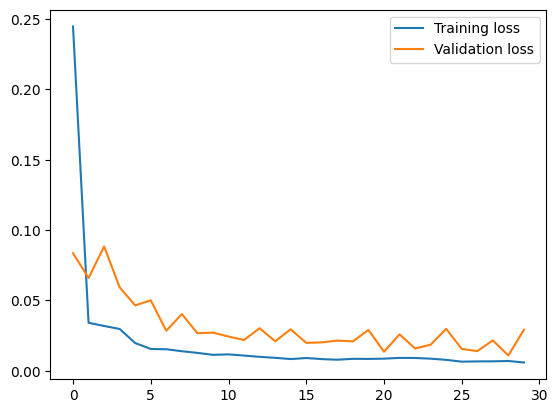

In [43]:
history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                    validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [44]:
prediction = model.predict(testX)
print(prediction.shape, testY.shape)


1/1 [==============================] - 1s 536ms/step
(11, 1) (11, 1)


In [46]:
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# substitute predictions into the first column
mean_values_pred[:, 0] = np.squeeze(prediction)

# inverse transform
y_pred = scaler.inverse_transform(mean_values_pred)[:,0]
print(y_pred.shape)

(11,)


In [47]:
mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# substitute testY into the first column
mean_values_testY[:, 0] = np.squeeze(testY)

# inverse transform
testY_original = scaler.inverse_transform(mean_values_testY)[:,0]
print(testY_original.shape)

(11,)


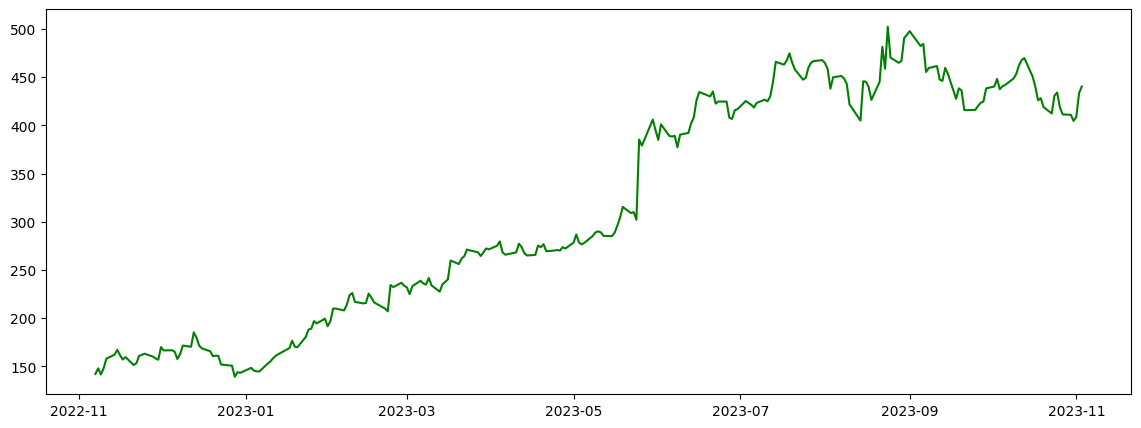

In [48]:
plt.figure(figsize=(14, 5))

# plot original 'Open' prices
plt.plot(dates, original_open, color='green', label='Original Open Price')

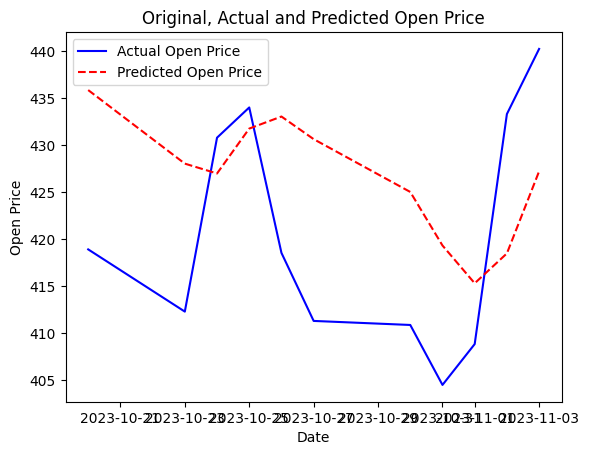

In [49]:
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual Open Price')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Original, Actual and Predicted Open Price')
plt.legend()
plt.show()

In [ ]:
zoom_start = len(test_dates) - 50
zoom_end = len(test_dates)

# Create the zoomed plot
plt.figure(figsize=(14, 5))
adjusted_start = zoom_start - seq_len

plt.plot(test_dates[zoom_start:zoom_end],
         testY_original[adjusted_start:zoom_end - zoom_start + adjusted_start],
         color='blue',
         label='Actual Open Price')

plt.plot(test_dates[zoom_start:zoom_end],
         y_pred[adjusted_start:zoom_end - zoom_start + adjusted_start ],
         color='red',
         linestyle='--',
         label='Predicted Open Price')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Zoomed In Actual vs Predicted Open Price')
plt.legend()
plt.show()

In [78]:
data = df_temp_all
data

,TEMP
TIME,
0,286.797
1,287.082
2,285.938
3,285.772
4,286.357
...,...
945115,933.812
945116,934.304
945117,934.530


In [77]:
data['TEMP'].shape

(945120,)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import trange
import random

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['TEMP'] = scaler.fit_transform(data['TEMP']).to_numpy().reshape(-1,1)
data['TEMP']

ValueError: Expected 2D array, got 1D array instead:
array=[286.797 287.082 285.938 ... 934.53  934.443 934.625].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# LSTM Examples

# Transformer Examples